In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../Utils')
from eda import AnaliseEDA

In [44]:
eda = AnaliseEDA()


In [45]:
df = pd.read_csv("../Dados/insurance.csv")
df.head()#Mostrando as 5 primeiras linhas da tabela

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Aqui vemos que os dados estão nos tipos certos e que não apresentam missing velues, logo não irei me preocupar em tratar valores vazios! Agora irei analisar a distribução dos dados e como estão os seus quartis

In [47]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Após a analise das descrições dos dados, vemos que não há valores faltantes e não apresenta outlies significativos, mas vou fazer um plot para ver a distribuição dos dados e ver se estão normalizados ou se há dados irregulares, mas antes irei ver a descrição das variaveis categoricas.

In [48]:
df.select_dtypes(include="object").describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Após a análise, vemos que o sexo mais presente nos pacientes são os masculino, a maioria dos pacientes são fumentes e a região mais se destaca entre os pacientes são os do sudeste. Após a analise dos describe irei começar a analise unvariada das features.

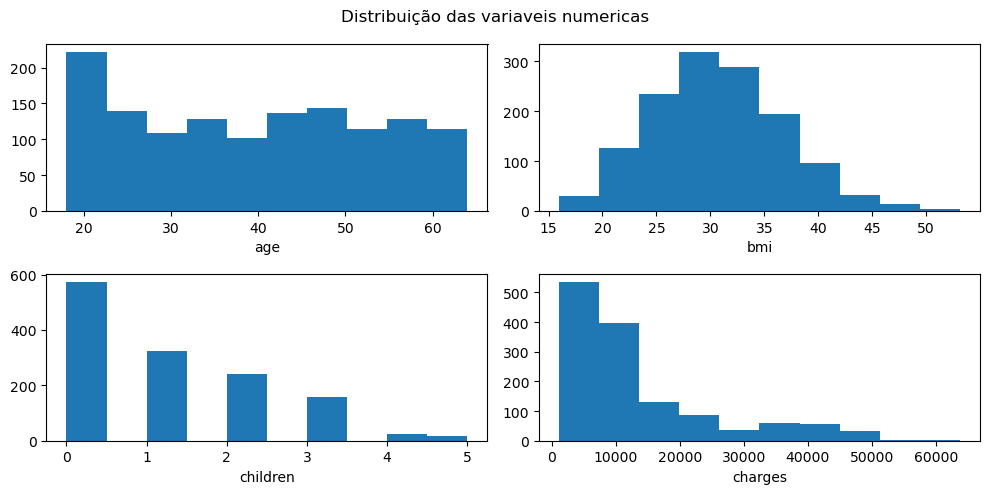

In [49]:
eda.analiseUnivariada(df, "number")



#### 📊 Análise Univariada(features nummericas)

#### 🔹 Charges (Valor cobrado pelo seguro)

A variável `charges` apresenta uma **distribuição assimétrica à direita**, indicando a presença de **outliers** — ou seja, alguns pacientes têm valores de cobrança bem mais altos que a maioria. Isso pode estar relacionado a fatores como idade avançada, tabagismo ou alto IMC.

#### 🔹 Idade (`age`)

A distribuição da idade mostra uma **concentração de pacientes entre 18 e 23 anos**. Após essa faixa, a quantidade de dados se mantém relativamente constante até os 60 anos, o que sugere uma **distribuição mais uniforme** nas demais faixas etárias.

#### 🔹 IMC (`bmi`)

A variável `bmi` possui uma **distribuição aproximadamente simétrica**, com maior concentração de valores em torno de **30**, indicando que muitos pacientes estão **próximos ou acima da faixa de sobrepeso**.

#### 🔹 Número de filhos (`children`)

A maior parte dos pacientes possui **0 filhos**. A frequência diminui gradualmente até 5 filhos, o que mostra que é **raro encontrar pacientes com muitos filhos**.
Vamos partir para analise univariadas mas das colunas categoricas.


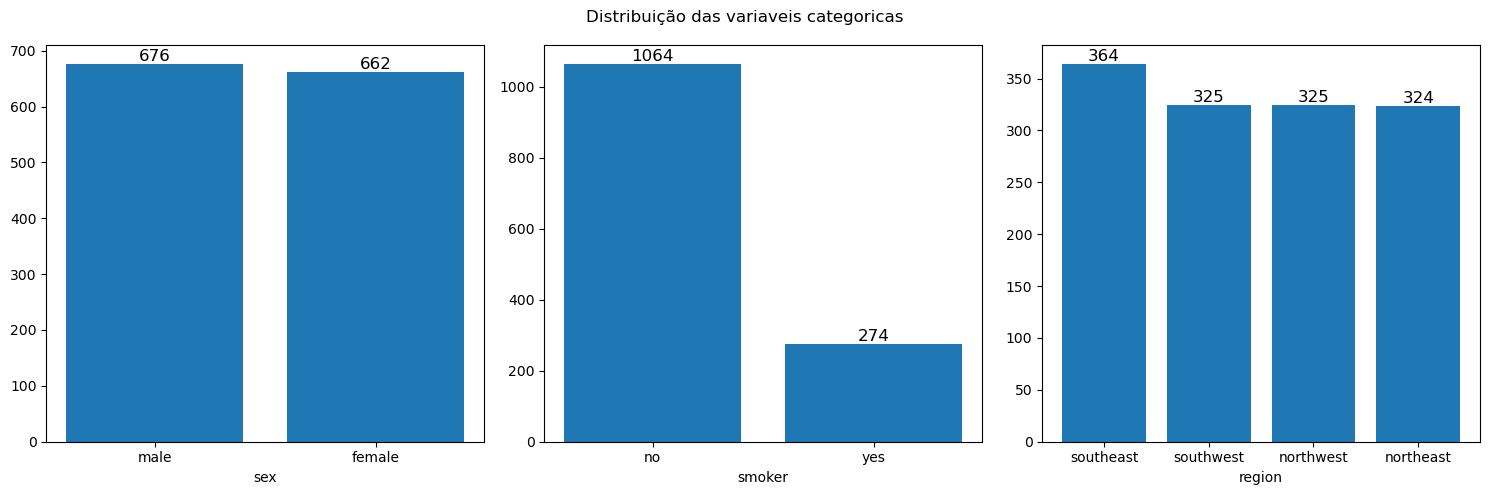

In [50]:
eda.analiseUnivariada(df, "object")

In [51]:

numeroCols = len(colunasNumericas)
numeroLinhas = (numeroCols + 2)/3

plt.figure(figsize=[15, 5 * numeroLinhas])
for i, coluna in enumerate(colunasNumericas):
    plt.subplot(numeroCols, 3, i+1)
    sns.scatterplot(x=df["charges"], y=df[coluna])
plt.tight_layout()
plt.show()

NameError: name 'colunasNumericas' is not defined

Após a analise fica claro que a assimetria da target acabou deixando uma analise muito confusa, podemos perceber segmentações de dados, mas não fica muito claro, então irei tratar a target e analisar novamente os dados e ver as relações entre essas variáveis

In [ ]:
df["chargeLog"] = np.log(df["charges"])

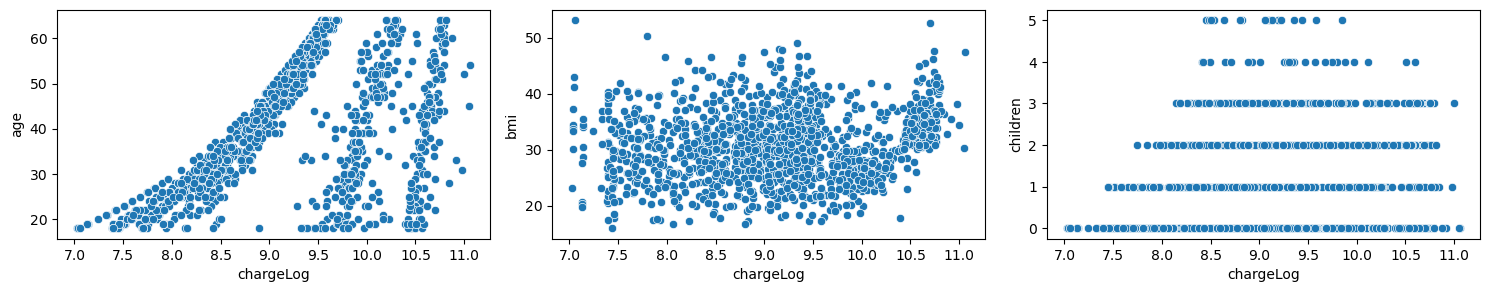

In [ ]:
colunasNumericas =['age', 'bmi', 'children']
numeroCols = len(colunasNumericas)
numeroLinhas = (numeroCols + 2)/3

plt.figure(figsize=[15, 5 * numeroLinhas])
for i, coluna in enumerate(colunasNumericas):
    plt.subplot(numeroCols, 3, i+1)
    sns.scatterplot(x=df["chargeLog"], y=df[coluna])
plt.tight_layout()
plt.show()

Após a tranformação logaritimica, percebemos um correlação confusa, mas com indícios que a idade influencía nos gastos no seguro, as pessoas mais velha tendem a ter um custo maior, mas para confirmar essa hipótese vou analisar a correlação das variaveis e ver se estou certo!

In [ ]:
df[['age', 'bmi', 'children', 'chargeLog']].corr()

,age,bmi,children,chargeLog
age,1.000000,0.109272,0.042469,0.527834
bmi,0.109272,1.000000,0.012759,0.132669
children,0.042469,0.012759,1.000000,0.161336
chargeLog,0.527834,0.132669,0.161336,1.000000


A análise dos dados revela uma forte correlação positiva entre a idade dos pacientes e os gastos do seguro, indicando que pacientes mais velhos tendem a gerar custos significativamente maiores. Esse padrão é consistente com a realidade do setor de saúde e parece ter uma certa relação em quantidade de filhos e os gastos, o que também faz sentido, já que com mais crianças os gastos de saúde são bem maiores. Agora vamos analisar o quanto as variaveis categóricas influenciam nos custos(charges)

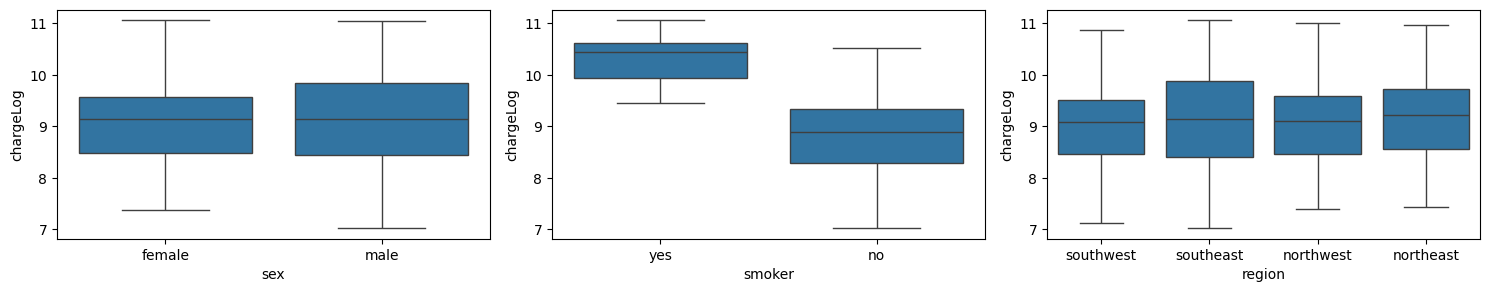

In [ ]:
variaveisCategoricas =['sex', 'smoker', 'region']

numeroCols = len(variaveisCategoricas)
numeroLinhas = (numeroCols + 2)/3

plt.figure(figsize=[15, 5 * numeroLinhas])
for i, coluna in enumerate(variaveisCategoricas):
    plt.subplot(numeroCols, 3, i+1)
    sns.boxplot(x=df[coluna], y=df["chargeLog"])
plt.tight_layout()
plt.show()

Após a analise dos gráficos, fica nítido que os que fumam tendem a ter gastos maiores, enquanto as outras features estão bem distribuídas, sem apresentar diferenças significativas! Vamos ver se esses fumantes tem idades mais altas para analisarmos se há um padrão entre essas duas features!

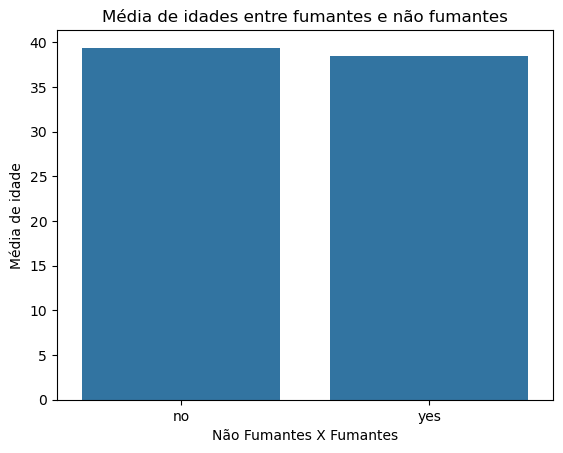

In [ ]:
mediaDeIdadeDeFumantesENaoFumantes = df[["smoker", "age"]].groupby("smoker").mean()
sns.barplot(mediaDeIdadeDeFumantesENaoFumantes, x="smoker", y="age")
plt.xlabel("Não Fumantes X Fumantes")
plt.ylabel("Média de idade")
plt.title("Média de idades entre fumantes e não fumantes")
plt.show()

Analisando o gráfico acima, não aparentar ter uma diferença grande, logo não há ua relação entre essas duas features! Vou analisar se existe entre a  a feature smoker e children

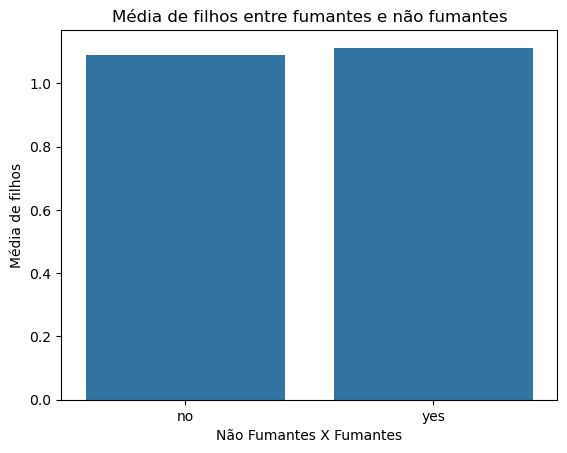

In [ ]:
mediaDeIdadeDeFumantesENaoFumantes = df[["smoker", "children"]].groupby("smoker").mean()
sns.barplot(mediaDeIdadeDeFumantesENaoFumantes, x="smoker", y="children")
plt.xlabel("Não Fumantes X Fumantes")
plt.ylabel("Média de filhos")
plt.title("Média de filhos entre fumantes e não fumantes")
plt.show()

O gráfico acima também não apresenta diferenças de média de filhos o que nos mostra que não há uma relação entre essas features. Agora vou começar o tratamento das variaveis categoricas para passar para construção do modelo preditivo!

In [ ]:
df_tratado = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)#Tranformando features categoricas em numericas

In [ ]:
df_tratado.head()

,age,bmi,children,charges,chargeLog,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,9.734176,False,True,False,False,True
1,18,33.770,1,1725.55230,7.453302,True,False,False,True,False
2,28,33.000,3,4449.46200,8.400538,True,False,False,True,False
3,33,22.705,0,21984.47061,9.998092,True,False,True,False,False
4,32,28.880,0,3866.85520,8.260197,True,False,True,False,False


In [ ]:
df_tratado.to_csv("../Dados/Base de Dados Tratada (insurance).csv")